# **Importing necessary libraries**

In [35]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# **Loading and reading the dataset**

In [7]:
Power_Plant_dataset = pd.read_csv("/content/drive/MyDrive/Global_Power_Plant.csv")

In [8]:
Power_Plant_dataset.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,fuel1,fuel2,fuel3,...,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN


# **Data Pre-Processing & Exploratory Data Analysis (EDA)**

## **Information of The Dataset**

In [9]:
Power_Plant_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28664 entries, 0 to 28663
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   28664 non-null  object 
 1   country_long              28664 non-null  object 
 2   name                      28644 non-null  object 
 3   gppd_idnr                 28664 non-null  object 
 4   capacity_mw               28664 non-null  float64
 5   latitude                  28664 non-null  float64
 6   longitude                 28664 non-null  float64
 7   fuel1                     28661 non-null  object 
 8   fuel2                     1705 non-null   object 
 9   fuel3                     296 non-null    object 
 10  fuel4                     108 non-null    object 
 11  commissioning_year        14952 non-null  float64
 12  owner                     18093 non-null  object 
 13  source                    28664 non-null  object 
 14  url   

## **Shape of The Dataset**

In [10]:
Power_Plant_dataset.shape

(28664, 22)

## **Check columns list and missing values**

In [11]:
Power_Plant_dataset.isnull().sum()

,0
country,0
country_long,0
name,20
gppd_idnr,0
capacity_mw,0
latitude,0
longitude,0
fuel1,3
fuel2,26959
fuel3,28368


## **Get unique count for each variable**

In [12]:
Power_Plant_dataset.nunique()

,0
country,164
country_long,164
name,28261
gppd_idnr,28664
capacity_mw,5294
latitude,26447
longitude,27179
fuel1,15
fuel2,11
fuel3,11


## **Check variable data types**

In [13]:
Power_Plant_dataset.dtypes

,0
country,object
country_long,object
name,object
gppd_idnr,object
capacity_mw,float64
latitude,float64
longitude,float64
fuel1,object
fuel2,object
fuel3,object


## **Replace all None/null values with NaN**

In [14]:
Power_Plant_dataset = Power_Plant_dataset.replace({None: np.nan})

In [15]:
Power_Plant_dataset.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,fuel1,fuel2,fuel3,...,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN


## **Check for duplicate rows**

In [16]:
print("\nDuplicate rows count:", Power_Plant_dataset.duplicated().sum())
Power_Plant_dataset = Power_Plant_dataset.drop_duplicates()


Duplicate rows count: 0


## **Detect and handle outliers using IQR method**

In [17]:
numerical_cols = Power_Plant_dataset.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    Q1 = Power_Plant_dataset[col].quantile(0.25)
    Q3 = Power_Plant_dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Replace outliers with bounds
    Power_Plant_dataset[col] = np.where(Power_Plant_dataset[col] < lower_bound, lower_bound, Power_Plant_dataset[col])
    Power_Plant_dataset[col] = np.where(Power_Plant_dataset[col] > upper_bound, upper_bound, Power_Plant_dataset[col])

## **Statistical Analysis**

### **Descriptive Statistics**

In [18]:
print("\nSummary statistics:")
Power_Plant_dataset.describe()


Summary statistics:


,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh
count,28664.000000,28664.000000,28664.000000,14952.000000,16145.0,439.000000,455.000000,958.000000,8326.000000,27536.000000
mean,66.351958,34.886685,-12.913466,1995.651983,2016.0,1755.097077,2118.594242,1357.799250,114.378916,197.673944
std,88.129382,17.546276,76.460684,20.664553,0.0,2078.282290,2449.615165,1771.522523,163.211210,268.145431
min,1.000000,-0.444850,-179.977700,1944.500000,2016.0,0.000000,0.000000,0.000000,-256.769748,0.000000
25%,4.795850,28.010225,-79.057475,1985.000000,2016.0,226.735625,253.466300,57.898941,3.197500,8.099628
50%,18.640000,39.950000,-3.928400,2004.000000,2016.0,731.334950,1015.676100,468.989500,20.354000,44.796959
75%,99.200000,46.980275,21.007025,2012.000000,2016.0,2636.217675,3170.871000,2152.211500,176.508999,293.907237
max,240.806225,75.435350,171.103775,2018.000000,2016.0,6250.440750,7546.978050,5293.680338,436.476246,722.618650


### **Distribution plots for key numerical features**

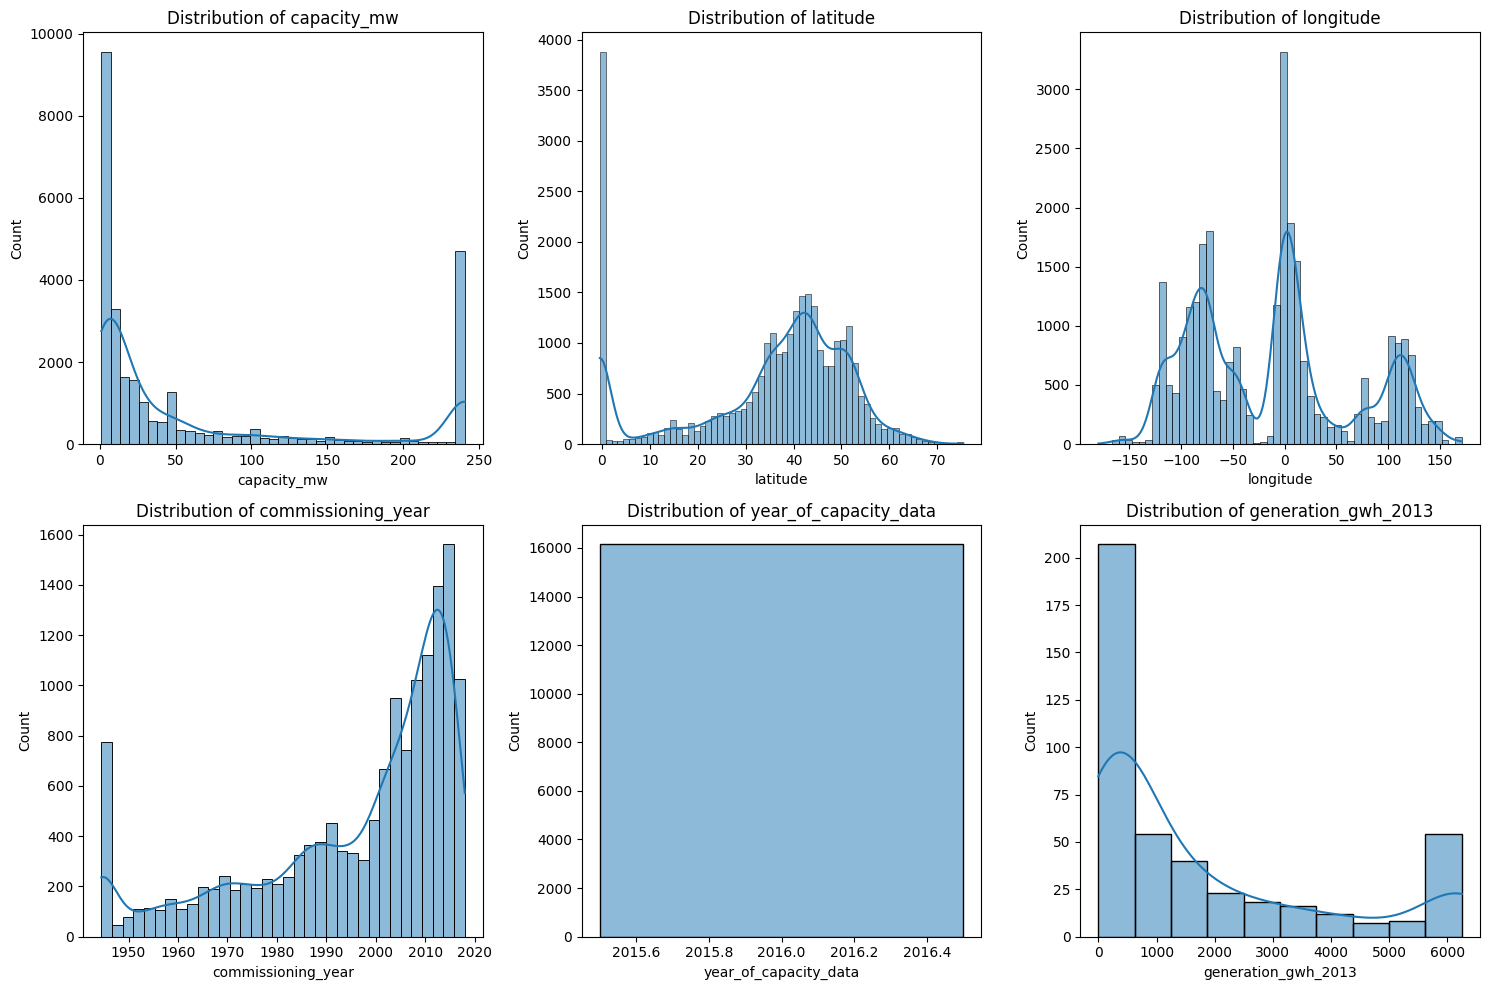

In [19]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:6]):
    plt.subplot(2, 3, i+1)
    sns.histplot(Power_Plant_dataset[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## **Identify Data Inconsistencies**

### **Check for invalid geolocations (latitude > 90 or longitude > 180)**

In [20]:
invalid_geo = Power_Plant_dataset[(Power_Plant_dataset['latitude'] > 90) | (Power_Plant_dataset['longitude'] > 180)]
print("\nInvalid geolocations:")
print(invalid_geo)


Invalid geolocations:
Empty DataFrame
Columns: [country, country_long, name, gppd_idnr, capacity_mw, latitude, longitude, fuel1, fuel2, fuel3, fuel4, commissioning_year, owner, source, url, geolocation_source, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, estimated_generation_gwh]
Index: []

[0 rows x 22 columns]


### **Handle invalid geolocations by removing rows**

In [21]:
Power_Plant_dataset = Power_Plant_dataset[(Power_Plant_dataset['latitude'] <= 90) & (Power_Plant_dataset['longitude'] <= 180)]

## **Summary Statistics and Insights**

In [22]:
print("\nKey insights:")
print(f"Number of power plants: {Power_Plant_dataset.shape[0]}")
print(f"Types of fuels used: {Power_Plant_dataset['fuel1'].unique()}")
print(f"Top 5 countries with most power plants:\n{Power_Plant_dataset['country'].value_counts().head()}")


Key insights:
Number of power plants: 28664
Types of fuels used: ['Hydro' 'Gas' 'Other' 'Oil' 'Wind' 'Nuclear' 'Coal' 'Solar' 'Waste'
 'Biomass' 'Wave and Tidal' 'Geothermal' nan 'Cogeneration' 'Storage'
 'Petcoke']
Top 5 countries with most power plants:
country
USA    8119
CHN    2901
GBR    2567
BRA    2340
FRA    2018
Name: count, dtype: int64


# **Visualisations**

## **Visualisation 1: Fuel Type vs. Capacity (A boxplot showing the distribution of power plant capacity for each fuel type)**

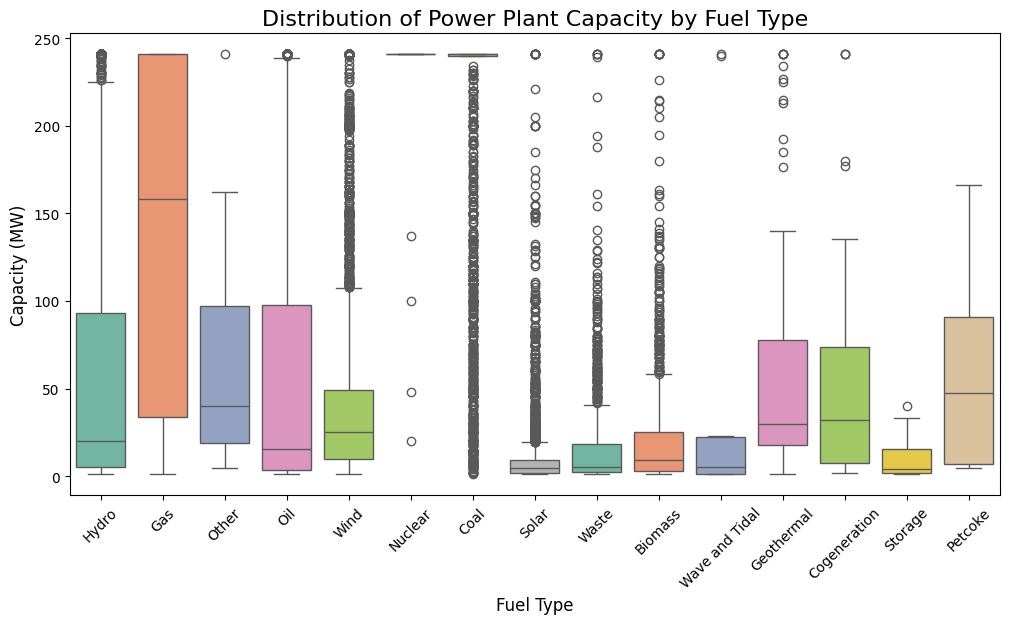

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=Power_Plant_dataset, x='fuel1', y='capacity_mw', palette='Set2')
plt.title('Distribution of Power Plant Capacity by Fuel Type', fontsize=16)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Capacity (MW)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## **Visualisation 2: Geographic Distribution of Power Plants by Fuel Type (A scatter plot of power plants' latitude and longitude, color-coded by fuel type)**

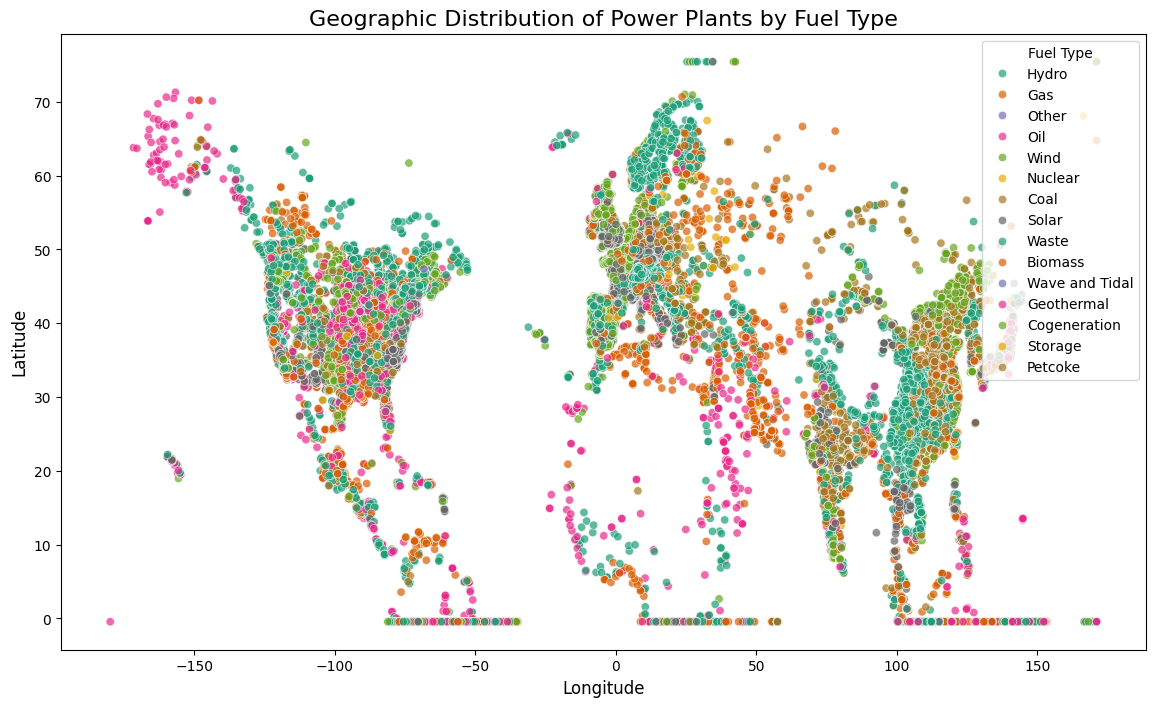

In [24]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=Power_Plant_dataset, x='longitude', y='latitude', hue='fuel1', palette='Dark2', alpha=0.7)
plt.title('Geographic Distribution of Power Plants by Fuel Type', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Fuel Type', loc='upper right')
plt.show()

## **Visualisation 3: Bar Plot of Total Capacity by Fuel Type (A bar chart showing total capacity for each fuel type)**

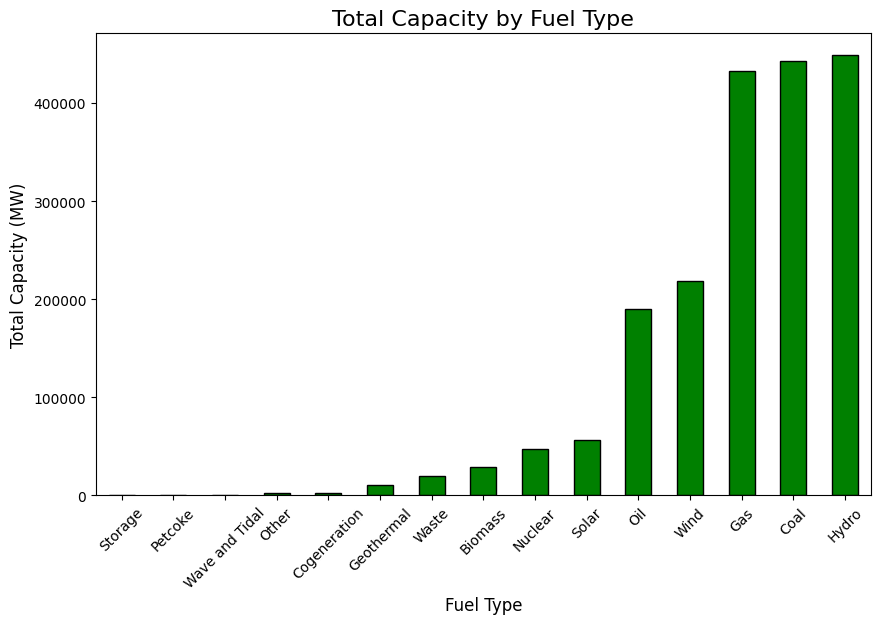

In [25]:
total_capacity = Power_Plant_dataset.groupby('fuel1')['capacity_mw'].sum().sort_values()
plt.figure(figsize=(10, 6))
total_capacity.plot(kind='bar', color='Green', edgecolor='black')
plt.title('Total Capacity by Fuel Type', fontsize=16)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Total Capacity (MW)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## **Visualisation 4: Latitude vs. Capacity (A scatter plot showing the relationship between latitude and power plant capacity)**

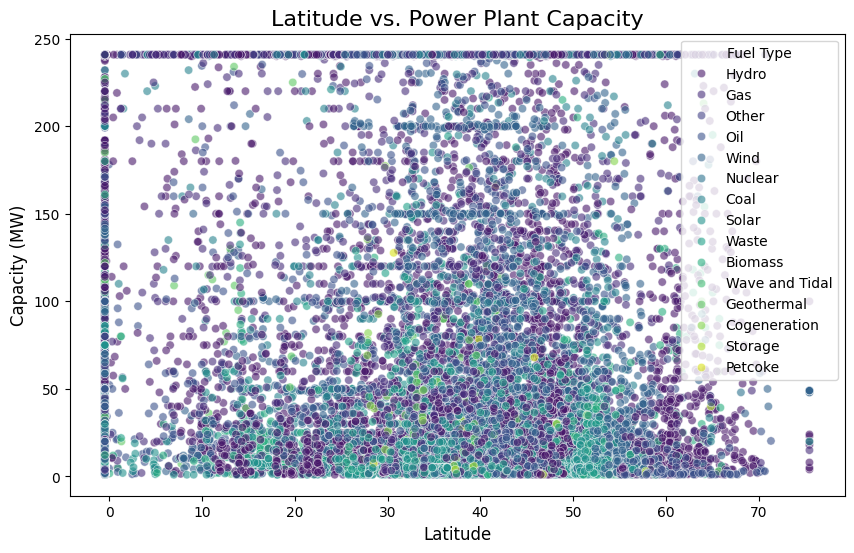

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Power_Plant_dataset, x='latitude', y='capacity_mw', hue='fuel1', palette='viridis', alpha=0.6)
plt.title('Latitude vs. Power Plant Capacity', fontsize=16)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Capacity (MW)', fontsize=12)
plt.legend(title='Fuel Type', loc='upper right')
plt.show()

## **Visualisation 5: estimated_generation_gwh vs. Capacity (A scatter plot comparing estimated_generation_gwh and capacity)**

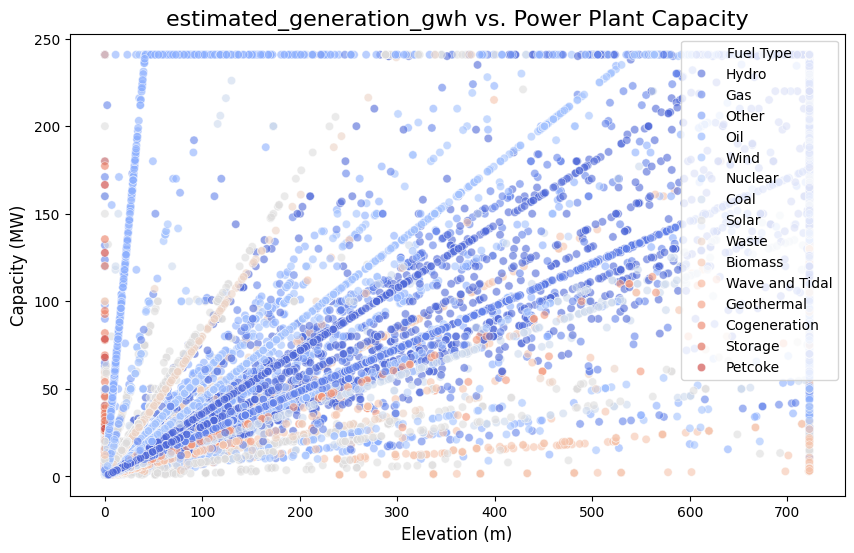

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Power_Plant_dataset, x='estimated_generation_gwh', y='capacity_mw', hue='fuel1', palette='coolwarm', alpha=0.6)
plt.title('estimated_generation_gwh vs. Power Plant Capacity', fontsize=16)
plt.xlabel('Elevation (m)', fontsize=12)
plt.ylabel('Capacity (MW)', fontsize=12)
plt.legend(title='Fuel Type', loc='upper right')
plt.show()

## **Visualisation 6: 3D Scatter Plot on Latitude, Longitude, & estimated_generation_gwh (A 3D scatter plot to visualize the combined effect of latitude, longitude, and estimated_generation_gwh)**

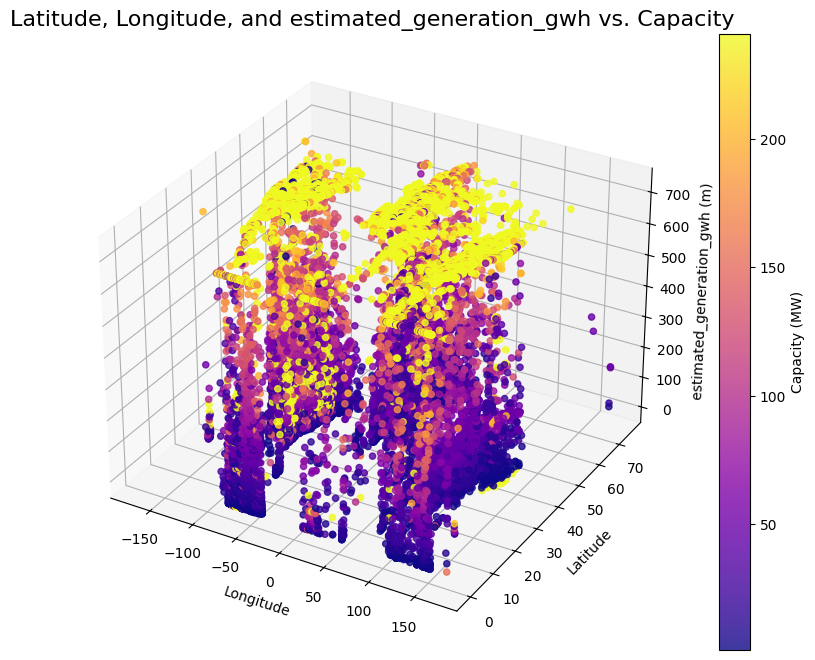

In [28]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(Power_Plant_dataset['longitude'], Power_Plant_dataset['latitude'], Power_Plant_dataset['estimated_generation_gwh'], c=Power_Plant_dataset['capacity_mw'], cmap='plasma', alpha=0.8)
ax.set_title('Latitude, Longitude, and estimated_generation_gwh vs. Capacity', fontsize=16)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('estimated_generation_gwh (m)')
fig.colorbar(sc, label='Capacity (MW)')
plt.show()

## **Visualisation 7: Renewable Power Plants Count by Country (A bar chart of the number of renewable power plants per country)**

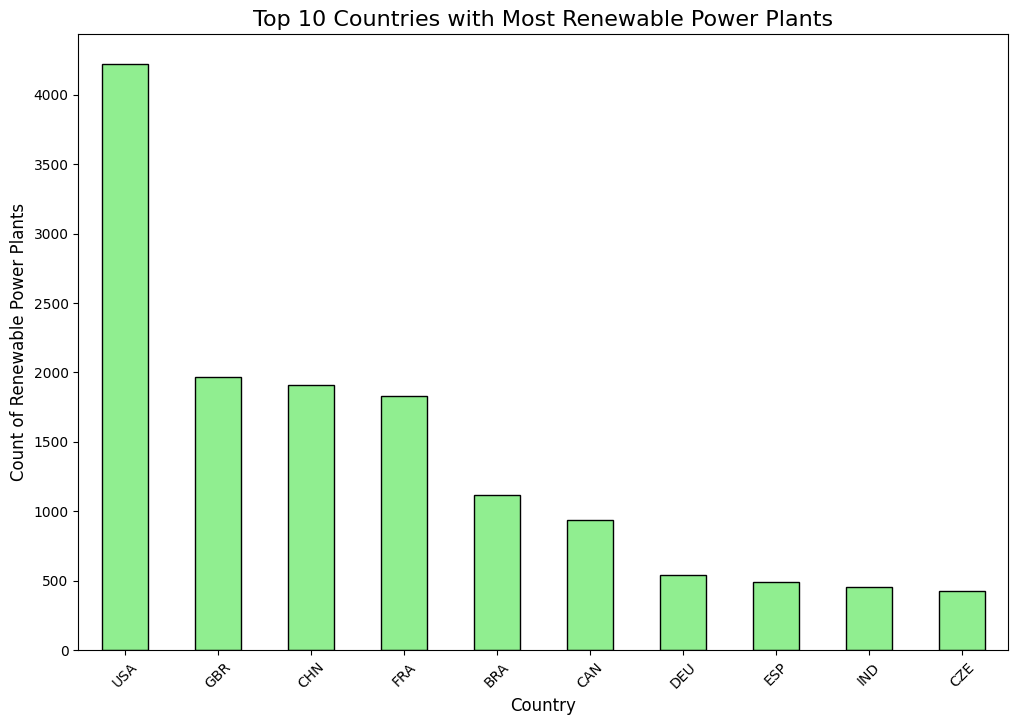

In [29]:
renewable_counts = Power_Plant_dataset[Power_Plant_dataset['fuel1'].isin(['Wind', 'Solar', 'Hydro'])].groupby('country')['fuel1'].count().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
renewable_counts.head(10).plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top 10 Countries with Most Renewable Power Plants', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count of Renewable Power Plants', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## **Visualisation 8: Renewable Power Plants vs. estimated_generation_gwh (A scatter plot of the number of renewable power plants versus estimated_generation_gwh)**

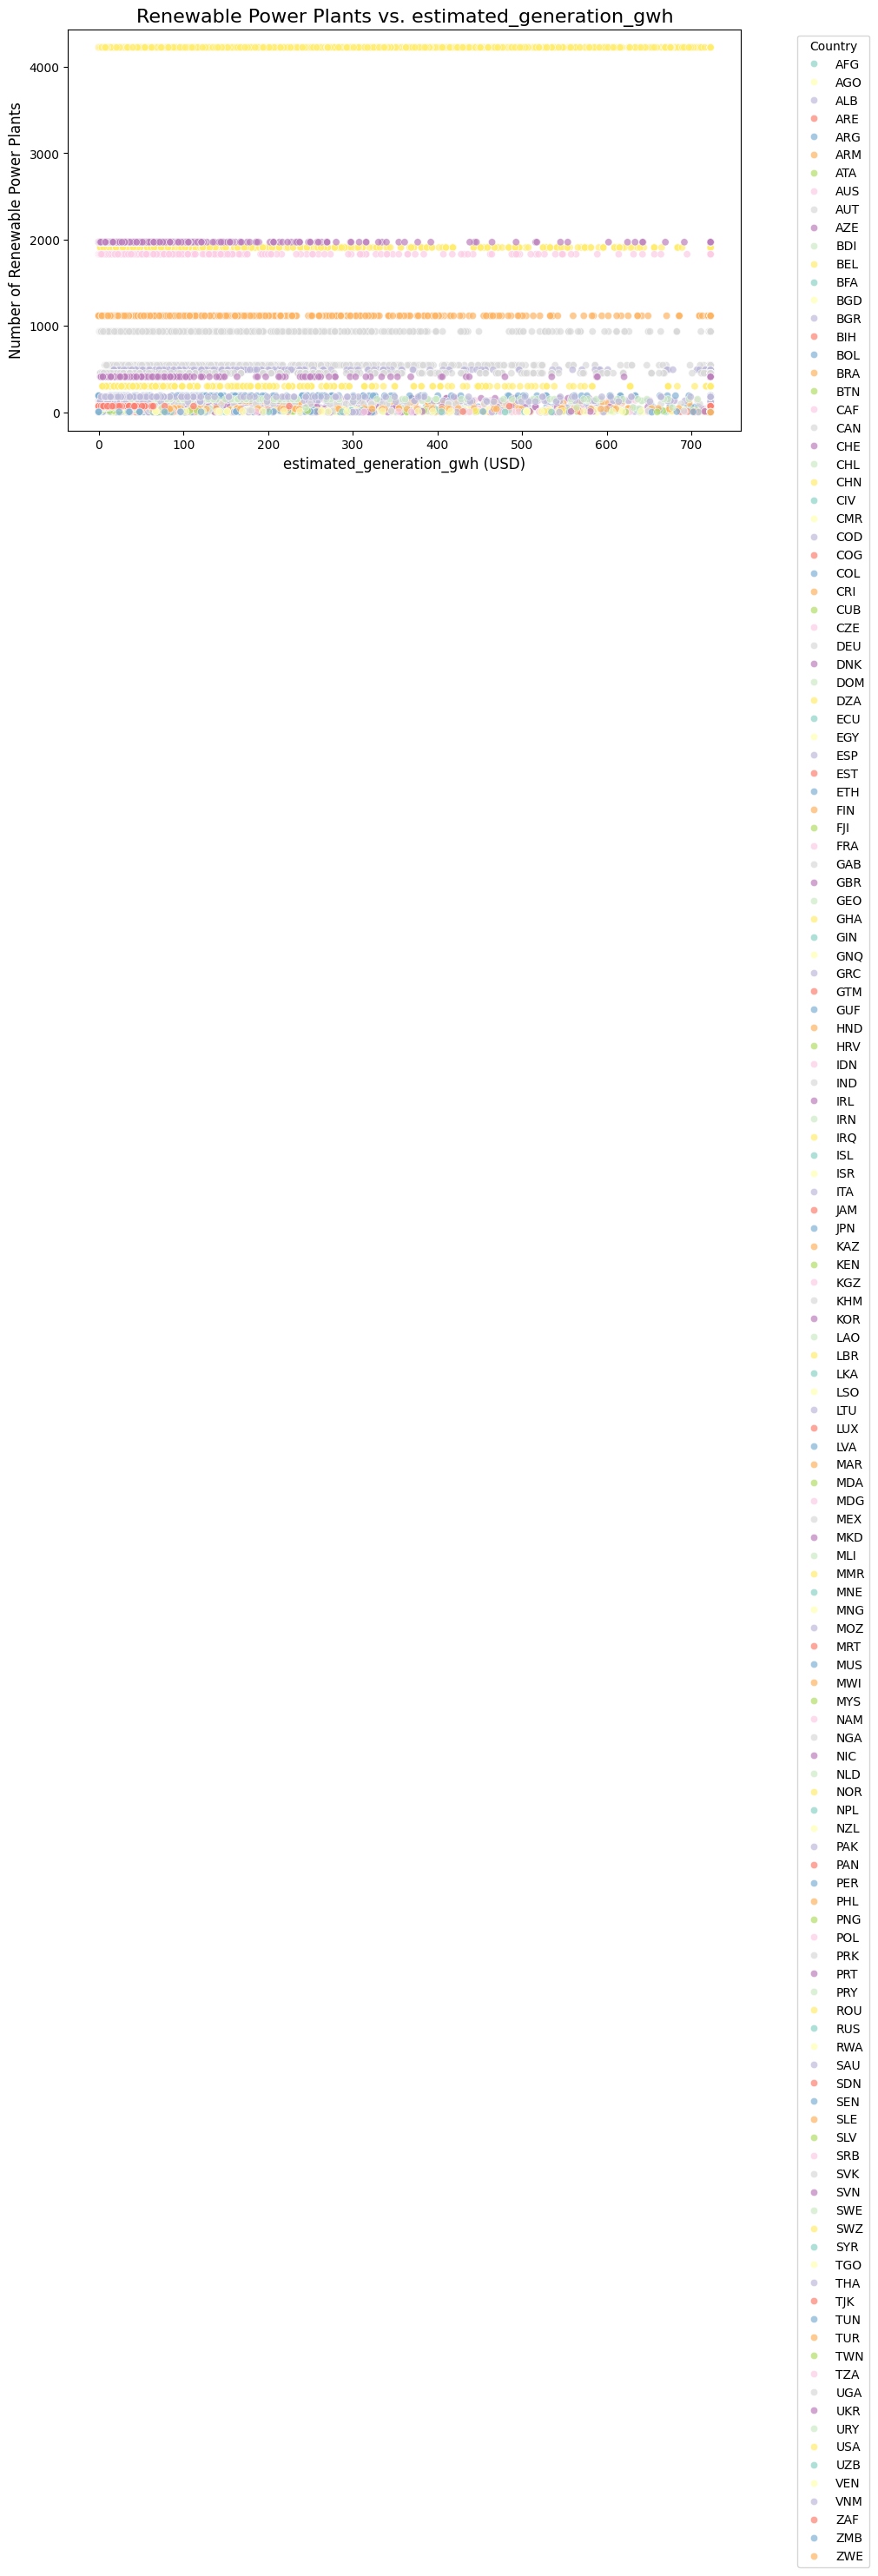

In [30]:
merged_df = Power_Plant_dataset[Power_Plant_dataset['fuel1'].isin(['Wind', 'Solar', 'Hydro'])].groupby('country').size().reset_index(name='renewable_count').merge(Power_Plant_dataset, on='country')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='estimated_generation_gwh', y='renewable_count', hue='country', palette='Set3', alpha=0.7)
plt.title('Renewable Power Plants vs. estimated_generation_gwh', fontsize=16)
plt.xlabel('estimated_generation_gwh (USD)', fontsize=12)
plt.ylabel('Number of Renewable Power Plants', fontsize=12)
plt.legend(title='Country', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

## **Visualisation 9: Renewable Plants vs. capacity_mw (A bar plot of renewable power plants versus population size)**

### **Filter for renewable energy types**

In [31]:
renewable_types = ['Wind', 'Solar', 'Hydro']
renewable_df = Power_Plant_dataset[Power_Plant_dataset['fuel1'].isin(renewable_types)]

### **Group by country and calculate total capacity for renewable plants**

In [32]:
renewable_capacity = renewable_df.groupby('country')['capacity_mw'].sum().reset_index()

### **Sort by total capacity and select top 10 countries for better visualization**

In [33]:
renewable_capacity_sorted = renewable_capacity.sort_values(by='capacity_mw', ascending=False).head(10)

### **Plot the bar chart**

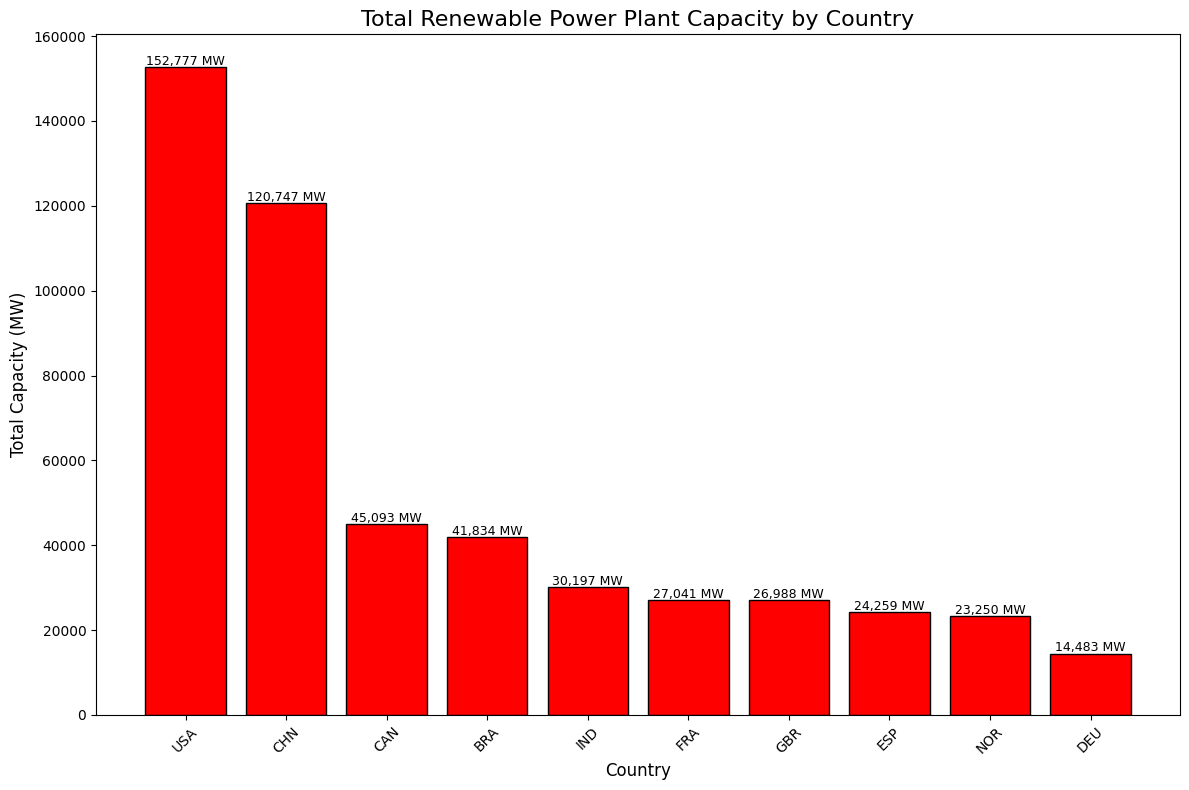

In [34]:
plt.figure(figsize=(12, 8))
bars = plt.bar(renewable_capacity_sorted['country'], renewable_capacity_sorted['capacity_mw'],
               color='Red', edgecolor='black')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500, f'{int(bar.get_height()):,} MW',
             ha='center', fontsize=9)
plt.title('Total Renewable Power Plant Capacity by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Capacity (MW)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()